# Introduction à sympy

In [48]:
# Attention : sympy import sin, cos, pi, ...
# Ne pas faire un from numpy import * (ou from math import *)
from sympy import *
from IPython.display import display
init_printing() # Permet d'afficher les équations

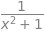

In [49]:
# Exemple
x = Symbol('x')
1/(1+x**2)

In [51]:
pi

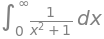

In [50]:
# Expression formelle
mon_integrale = Integral(1/(1+x**2), (x, 0, oo))
mon_integrale

In [52]:
# Calcul de l'intégrale
mon_integrale.doit()

Integral(1/(x**2 + 1), (x, 0, oo))


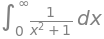

\int\limits_{0}^{\infty} \frac{1}{x^{2} + 1}\, dx


In [54]:
# Représenter une expression
print(mon_integrale) # permet de faire une copier/coller
display(mon_integrale) # Affiche joliment. 
print(latex(mon_integrale)) # Représentation pour latex

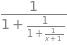

In [56]:
# Simplification
# Fonction ou méthode simplify

expr = 1/(1+1/(1+1/(1+x)))
display(expr)
display(simplify(expr))
#expr.simplify()

In [57]:
# Expansion
# Fonction ou méthode expand

a = Symbol('a')
b = Symbol('b')

expr = (a+b)**15
expr.expand()

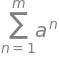

In [58]:
n = Symbol('n', integer=True, positive=True)
m = Symbol('m', integer=True, positive=True)
Sum(a**n, (n, 1, m))

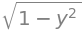

In [59]:
# Remplacer des valeurs
expr = sin(x)

y = Symbol('y')
display(expr.subs(x, acos(y)))

In [60]:
alpha = Symbol('alpha')
display(alpha) # Utilisation des lettres grec

In [67]:
e = Symbol('e')
epsilon_0 = Symbol('epsilon_0') # Indices
hbar = Symbol('hbar')
c = Symbol('c')
m_e = Symbol('m_e')
epsilon_0

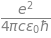

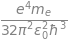

137.035999185956


In [69]:
fine_structure = e**2/(4*pi*epsilon_0*hbar*c)
display(fine_structure)

rydberg = m_e *c**2*alpha**2/2/hbar
display(rydberg)
rydberg = simplify(rydberg.subs(alpha, fine_structure) )
display(rydberg)

numerical_values = {
    e : 1.60217662E-19,
    epsilon_0 : 8.8541878128E-12,
    hbar : 1.0545718E-34,
    c : 299792458,
    m_e : 9.10938356E-31
}


print(N(1/fine_structure.subs(numerical_values)))
N(rydberg.subs(numerical_values))

In [70]:
# Devellopement limité
theta = Symbol('theta')
dev_sin = sin(theta).series(theta, 0, n=4)
display(dev_sin)
display(dev_sin.removeO())

In [71]:
# Limite

limit(sin(x)/x, x, 0)

In [72]:
# Dérivées

expr = x**2 * exp(x) * cos(x)
simplify(expr.diff(x))

In [73]:
# Intégrales 
integrale_compliquee = integrate(x**2 * exp(x) * cos(x), x)
integrale_compliquee

In [74]:
# Conversion vers numpy
import numpy as np

resultat_numpy = lambdify(x, integrale_compliquee)

resultat_numpy(np.linspace(0, 1))

array([-0.5       , -0.49999712, -0.49997664, -0.49991999, -0.49980758,
       -0.4996188 , -0.499332  , -0.49892456, -0.49837286, -0.49765231,
       -0.49673742, -0.49560179, -0.49421813, -0.49255835, -0.4905936 ,
       -0.48829426, -0.48563008, -0.4825702 , -0.4790832 , -0.47513723,
       -0.47070005, -0.46573913, -0.46022174, -0.45411508, -0.44738635,
       -0.44000291, -0.43193239, -0.42314279, -0.4136027 , -0.40328139,
       -0.39214899, -0.38017669, -0.36733688, -0.35360336, -0.33895155,
       -0.32335871, -0.30680413, -0.28926939, -0.27073864, -0.25119877,
       -0.23063978, -0.209055  , -0.1864414 , -0.16279992, -0.13813577,
       -0.11245877, -0.08578369, -0.05813065, -0.02952545,  0.        ])

In [75]:
print(integrale_compliquee)

x**2*exp(x)*sin(x)/2 + x**2*exp(x)*cos(x)/2 - x*exp(x)*sin(x) + exp(x)*sin(x)/2 - exp(x)*cos(x)/2


In [32]:
# Possibilité de simplifier le calcul numérique
# Common sub expression
cse(integrale_compliquee)

In [76]:
interm_expr, res = cse(integrale_compliquee)
for inter_var, expr in interm_expr:
    print(f'{inter_var} = {expr}')
print(res[0])

x0 = sin(x)
x1 = exp(x)
x2 = x1/2
x3 = x0*x2
x4 = x2*cos(x)
x5 = x**2
-x*x0*x1 + x3*x5 + x3 + x4*x5 - x4


In [77]:
x = np.linspace(0, 1, 1000000)

%timeit resultat_numpy(x)

113 ms ± 952 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [78]:
def ma_foncion(x):
    x0=np.sin(x)
    x1=np.exp(x)
    x2=x1/2
    x3=x0*x2
    x4=x2*np.cos(x)
    x5=x**2
    return -x*x0*x1 + x3*x5 + x3 + x4*x5 - x4

%timeit ma_foncion(x)

66.1 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [79]:
import numba

@numba.vectorize
def ma_foncion(x):
    x0=np.sin(x)
    x1=np.exp(x)
    x2=x1/2
    x3=x0*x2
    x4=x2*np.cos(x)
    x5=x**2
    return -x*x0*x1 + x3*x5 + x3 + x4*x5 - x4

ma_foncion(x)
%timeit ma_foncion(x)

36 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [80]:
# Vérifier des calculs manuels

expr1 = (a + I*b)**2
expr2 = a**2 - b**2  + 2*I*a*b
display(expr1)
display(expr2)
assert simplify(expr1-expr2)==0

In [19]:
# Lettres grec, indices
alpha = Symbol('alpha')
x_0 = Symbol('x_0')
display(alpha, x_0)

In [81]:
# Constantes
display(pi, I)

In [82]:
# Attenion ne pas utiliser de float
display(sqrt(pi/2))
display(sqrt((1/2)*pi))

In [84]:
# Assumption : permet de donner les conditions pour simplifier le calcul
x = Symbol('x')
a = Symbol('a')
integrate(exp(-a*x**2), x)

⎧√π⋅erf(√a⋅x)           
⎪────────────  for a ≠ 0
⎨    2⋅√a               
⎪                       
⎩     x        otherwise

In [85]:
a = Symbol('a', positive=True)
integrate(exp(-a*x**2), x)

In [86]:
# Ne pas oublier ce que l'on sait faire en python (boucle for, fonction!!!)

out = 0
for i, letter in enumerate('abcdefgh'):
    out += Symbol(letter)*x**i
display(out)

In [87]:

theta = Symbol('theta')
r = Symbol('r', positive=True)
phi = Symbol('phi')

def polar_gradient(u):
    return u.diff(r), u.diff(theta)/r, u.diff(phi)/(r*sin(theta))

def polar_divergence(u_r, u_theta, u_phi):
    return (u_r.diff(r) + 2*u_r/r + 
            u_theta.diff(theta)/r + u_theta*cos(theta)/(r*sin(theta)) + 
            u_phi.diff(phi)/(r*sin(theta)))

def polar_laplacien(u):
    return polar_divergence(*polar_gradient(u))


In [88]:
polar_laplacien(1/r)

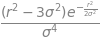

In [89]:
sigma = Symbol('sigma')
simplify(polar_laplacien(exp(-r**2/(2*sigma**2))))

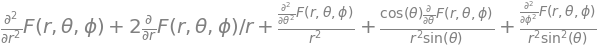

In [90]:
F = Function('F')
polar_laplacien(F(r, theta, phi))